<a href="https://colab.research.google.com/github/kabilan942/TensorFlow/blob/main/01_TF_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.8.2'

### Creating Data to View and Fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

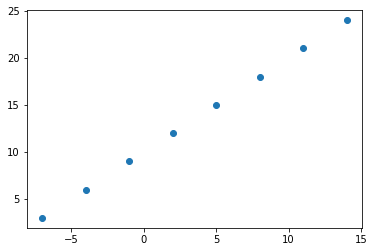

In [3]:
# creating features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# creating labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# visualizing it
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [5]:
# Demo tensor for house price prediction problem

house_info = tf.constant(['Bedroom', 'Bathroom', 'Garage'])
price_info = tf.constant([939700])
house_info, price_info

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'Bathroom', b'Garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
X[0], X[0].shape, X[0].ndim

(-7.0, (), 0)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape 

((), ())

In [10]:
# Turning the Numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape 

(TensorShape([]), TensorShape([]))

## Steps in Modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function and the optimizer (SGD, Adam - tells model how to improve loss function) and evaluation metrics.
3. **Fitting a model** - letting the model try the patterns between X & y (features & labels).

If you're using TensorFlow 2.7.0+, the `fit()` function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API  (sequentially go through the following)
# It groups a linear stack of layers into a tf.keras.Model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])  # 1 because X has only 1 feature and it is mapped to one label

# 2. Comile the model
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)  

Epoch 1/5
1/1 [==============================] - 0s 278ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))
# model.add(tf.keras.layers.Dense(1))

# equivalent

# model = tf.keras.Sequential(tf.keras.layers.Dense(1), tf.keras.layers.Dense)

In [20]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Making a prediction with our model
# Since there's no test data, we'll pass a random value of X
model.predict([17])

array([[12.716021]], dtype=float32)

There's a lot of error in this model

## Improving our Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from- instead of subset of training data, fit the model with the whole training dataset).


**Common ways to improve a Deep model:**
* Fitting for longer - increasing number of epochs
* Adding layers
* Increase number of hidden units
* Change the activation functions
* Change the optimization functions
* Change the learning rate - most important HPT in most neural networks
* Fitting on more data

### Fitting on more data

In [24]:
# Let's rebuild our model

# 1.Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train the model for longer - 100 epochs instead of 5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 271ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6

Just by altering one hyperparameter (number of epochs), the loss and mae has reduced from close to 11 to 7

In [25]:
 X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
# prediction of updated model
model.predict([17])

array([[29.739855]], dtype=float32)

Model has given a label of 29.739 from close to 12 (previously) for the input which is close to the actual output - 27

### Adding layers with hidden units

In [29]:
# Let's rebuild our model by changing another HPT - 

# 1. Create a model (with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss='mae', 
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 305ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2088 - mae: 12.2088
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.6861 - mae: 11.6861
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1615 - mae: 11.1615
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6118 - mae: 10.6118
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0388 - mae: 10.0388
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4399 - mae: 9.4399
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.8100 - mae: 8.8100
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1464 - mae: 8.1464
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4413 - mae: 7.4413
Epoch 11/100
1/1 [==============================] - 0s 5ms/step 

The loss has come down to 3.7131 from the previous loss of 6.889

In [30]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
model.predict([17.0])

array([[31.856882]], dtype=float32)

The prediction must be 27 and this predicts 31.856; This model predicted worser than the previous model even though the loss is lesser. Thus, the model is **overfitting**.

### Changing the Activation function

In [36]:
# using activation = None instead of 'relu'

model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation=None),
                             tf.keras.layers.Dense(1)])

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 632ms/step - loss: 13.4562 - mae: 13.4562
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9006 - mae: 12.9006
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3433 - mae: 12.3433
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7814 - mae: 11.7814
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2120 - mae: 11.2120
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6322 - mae: 10.6322
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0390 - mae: 10.0390
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4293 - mae: 9.4293
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.8000 - mae: 8.8000
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1478 - mae: 8.1478
Epoch 11/100
1/1 [==============================] - 0s 7ms/st

In [37]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [38]:
model.predict([17.0])

array([[29.716785]], dtype=float32)

The loss is higher than the previous case, but the predicted label is closer to the actual label; overfitting doesn't occur

### Changing the Optimization function

In [39]:
# using optimizer = Adam instead of SGD

model = tf.keras.Sequential([tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)])

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(),
              metrics='mae')

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 470ms/step - loss: 12.0125 - mae: 12.0125
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9367 - mae: 11.9367
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 11.8608 - mae: 11.8608
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7848 - mae: 11.7848
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7088 - mae: 11.7088
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6327 - mae: 11.6327
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5565 - mae: 11.5565
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 11.4802 - mae: 11.4802
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4039 - mae: 11.4039
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 11.3274 - mae: 11.3274
Epoch 11/100
1/1 [==============================] 

In [40]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [41]:
model.predict([17.])

array([[31.25573]], dtype=float32)

### Change the learning rate in Optimization function

In [42]:
# Changing learning rate in adam optimizer (here lr = 0.01 instead of the default lr = 0.001)

model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation=None),
                             tf.keras.layers.Dense(1)])

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics='mae')

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 464ms/step - loss: 12.8763 - mae: 12.8763
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 11.8505 - mae: 11.8505
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8183 - mae: 10.8183
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.7764 - mae: 9.7764
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 8.7186 - mae: 8.7186
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 7.6372 - mae: 7.6372
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8147 - mae: 6.8147
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 7.1374 - mae: 7.1374
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5567 - mae: 7.5567
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7356 - mae: 7.7356
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - loss: 7.

In [43]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [44]:
model.predict([17.0])

array([[26.71068]], dtype=float32)

This model has a very low loss of 0.3732 and a predicted label of 26.71 which is very close to the actual label of 26.0; our best model as of yet.

The **Learning Rate** is **potentially the most important HPT we can change in the neural network**.

## Evaluating a Model